# 🏥 뉴욕주립병원 입원환자 퇴원 금액

In [1]:
import pandas as pd

h_df = pd.read_csv('../new/t_hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv', low_memory=False)
h_df


,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,NaN,NaN,NaN,NaN,NaN,0,Y,Y,11738.58,3295.21


In [2]:
# 결측치 확인
h_df.isna().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [3]:
# 중복값 확인
h_df.duplicated().sum()

0

In [4]:
# 불필요 컬럼 삭제
columns = ['index','Health Service Area','Hospital County','Operating Certificate Number', 'Facility ID','Age Group', 'Gender', 'Race', 
'Ethnicity','Length of Stay', 'Type of Admission', 'Patient Disposition','Discharge Year', 'CCS Diagnosis Code','CCS Procedure Code',
'APR DRG Code', 'APR MDC Code','APR Severity of Illness Code','APR Risk of Mortality','APR Medical Surgical Description','Attending Provider License Number',
'Operating Provider License Number','Other Provider License Number','Birth Weight','Abortion Edit Indicator',
'Emergency Department Indicator', 'Discharge Year', 'Total Charges']

pre_h_df = h_df[columns].copy()
pre_h_df

pre_h_df = pre_h_df.drop(labels = ['index','Discharge Year', 'Abortion Edit Indicator'], axis =1)

In [5]:
# 결측치 삭제
pre_h_df = pre_h_df.dropna().reset_index(drop=True)

In [6]:
# 중복값 확인
pre_h_df.duplicated().sum()

5660

In [7]:
# 중복값 삭제
pre_h_df = pre_h_df.drop_duplicates().reset_index(drop=True)

In [8]:
pre_h_df

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,...,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges
0,Capital/Adiron,Albany,101000.0,1.0,70 or Older,F,White,Not Span/Hispanic,5,Elective,...,23,2,Minor,Medical,140796.0,140796.0,170254.0,0,N,13593.51
1,Capital/Adiron,Albany,101000.0,1.0,70 or Older,F,White,Not Span/Hispanic,4,Elective,...,8,1,Minor,Surgical,170254.0,170254.0,170254.0,0,N,31962.58
2,Capital/Adiron,Albany,101000.0,1.0,50 to 69,F,White,Not Span/Hispanic,3,Emergency,...,5,2,Minor,Surgical,173488.0,228744.0,163259.0,0,N,49293.65
3,Capital/Adiron,Albany,101000.0,1.0,0 to 17,M,Other Race,Not Span/Hispanic,2,Elective,...,6,2,Minor,Surgical,223982.0,223982.0,223982.0,0,N,13340.04
4,Capital/Adiron,Albany,101000.0,1.0,50 to 69,M,White,Not Span/Hispanic,1,Urgent,...,5,3,Moderate,Surgical,203505.0,203505.0,247198.0,0,N,72332.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,1,Emergency,...,8,4,Extreme,Surgical,208380.0,254201.0,250821.0,0,Y,35944.79
361437,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,5,Emergency,...,7,2,Minor,Surgical,211442.0,111484.0,162349.0,0,Y,35212.85
361438,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,17,Emergency,...,4,3,Major,Medical,247407.0,121816.0,157085.0,0,Y,37885.91
361439,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,8,Emergency,...,10,2,Moderate,Medical,146390.0,162349.0,259865.0,0,Y,17651.88


In [9]:
# 정보 확인 후 범주형 데이터 분리
pre_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361441 entries, 0 to 361440
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Health Service Area                361441 non-null  object 
 1   Hospital County                    361441 non-null  object 
 2   Operating Certificate Number       361441 non-null  float64
 3   Facility ID                        361441 non-null  float64
 4   Age Group                          361441 non-null  object 
 5   Gender                             361441 non-null  object 
 6   Race                               361441 non-null  object 
 7   Ethnicity                          361441 non-null  object 
 8   Length of Stay                     361441 non-null  object 
 9   Type of Admission                  361441 non-null  object 
 10  Patient Disposition                361441 non-null  object 
 11  CCS Diagnosis Code                 3614

In [10]:
# 범주형 데이터 분리

category_h_df = pre_h_df.select_dtypes(include=['object']).copy()

# int, float 데이터 분리
numeric_h_df = pre_h_df.select_dtypes(include=['int64', 'float64']).copy()

In [11]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder

columns = category_h_df.columns
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    # 각 컬럼 데이터를 리스트로 변환
    category_h_df[column] = encoder.fit_transform(category_h_df[column].tolist())
    encoders[column] = encoder.classes_

category_h_df.sort_index(inplace=True)
numeric_h_df.sort_index(inplace=True)

# # 범주형과 수치형 데이터 프레임을 결합합니다.
num_h_df = pd.concat([category_h_df, numeric_h_df], axis=1)
num_h_df


,Health Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Risk of Mortality,...,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
0,0,0,4,0,3,0,65,0,8,2,...,254.0,215.0,860,23,2,140796.0,140796.0,170254.0,0,13593.51
1,0,0,4,0,3,0,54,0,12,2,...,203.0,153.0,301,8,1,170254.0,170254.0,170254.0,0,31962.58
2,0,0,3,0,3,0,43,1,7,2,...,100.0,45.0,174,5,2,173488.0,228744.0,163259.0,0,49293.65
3,0,0,0,1,1,0,32,0,7,2,...,214.0,72.0,221,6,2,223982.0,223982.0,223982.0,0,13340.04
4,0,0,3,1,3,0,0,5,7,3,...,108.0,48.0,161,5,3,203505.0,203505.0,247198.0,0,72332.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,7,11,4,0,3,0,0,1,17,0,...,226.0,146.0,308,8,4,208380.0,254201.0,250821.0,0,35944.79
361437,7,11,4,0,3,0,65,1,7,2,...,149.0,84.0,263,7,2,211442.0,111484.0,162349.0,0,35212.85
361438,7,11,4,0,3,0,29,1,7,1,...,19.0,83.0,136,4,3,247407.0,121816.0,157085.0,0,37885.91
361439,7,11,4,0,3,0,98,1,7,3,...,51.0,70.0,424,10,2,146390.0,162349.0,259865.0,0,17651.88


In [12]:
# 이상치 삭제 진행을 위한 정규화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(num_h_df)
std_num_h_df = pd.DataFrame(result, columns=num_h_df.columns)
std_num_h_df

,Health Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Risk of Mortality,...,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
0,-2.315504,-1.863162,1.104413,-0.875222,0.799466,-0.426063,0.825215,-0.912021,-0.185365,0.068137,...,0.571908,1.000961,2.018737,2.364546,-0.030751,-0.135554,-0.155637,-0.169733,-0.302982,-0.336078
1,-2.315504,-1.863162,1.104413,-0.875222,0.799466,-0.426063,0.427788,-0.912021,0.856240,0.068137,...,0.196165,0.082868,-0.410267,-0.337833,-1.084564,-0.132248,-0.152774,-0.169733,-0.302982,-0.033094
2,-2.315504,-1.863162,0.368015,-0.875222,0.799466,-0.426063,0.030361,-0.192064,-0.445766,0.068137,...,-0.562687,-1.516389,-0.962116,-0.878309,-0.030751,-0.131885,-0.147090,-0.170305,-0.302982,0.252768
3,-2.315504,-1.863162,-1.841180,1.142413,-0.745100,-0.426063,-0.367066,-0.912021,-0.445766,0.068137,...,0.277208,-1.116575,-0.757888,-0.698151,-0.030751,-0.126219,-0.147553,-0.165334,-0.302982,-0.340258
4,-2.315504,-1.863162,0.368015,1.142413,0.799466,-0.426063,-1.523217,2.687764,-0.445766,1.359023,...,-0.503747,-1.471966,-1.018604,-0.878309,1.023063,-0.128516,-0.149543,-0.163433,-0.302982,0.632773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,-1.523217,-0.192064,2.158246,-2.513635,...,0.365618,-0.020787,-0.379850,-0.337833,2.076876,-0.127969,-0.144616,-0.163137,-0.302982,0.032589
361437,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,0.825215,-0.192064,-0.445766,0.068137,...,-0.201680,-0.938880,-0.575387,-0.517992,-0.030751,-0.127626,-0.158485,-0.170380,-0.302982,0.020516
361438,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,-0.475455,-0.192064,-0.445766,-1.222749,...,-1.159455,-0.953688,-1.127236,-1.058468,1.023063,-0.123590,-0.157481,-0.170811,-0.302982,0.064606
361439,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,2.017496,-0.192064,-0.445766,1.359023,...,-0.923695,-1.146191,0.124201,0.022484,-0.030751,-0.134926,-0.153542,-0.162396,-0.302982,-0.269138


In [13]:
condition = True
error_count = []

for column in std_num_h_df.columns:
    # 현재 컬럼에 대해 -1.96과 1.96 사이에 속하는 값을 카운트합니다.
    count = std_num_h_df[column].between(-1.96, 1.96).sum()
    error_count.append(count)
    # condition &= std_numeric_h_df[column].between(-1.96, 1.96)

# std_numeric_h_df = std_numeric_h_df[condition]
# std_numeric_h_df

for column, count in zip(std_num_h_df.columns, error_count):
    # 이상치의 개수는 전체 데이터 개수에서 정상적인 값의 개수를 빼면 됩니다.
    outlier_count = len(std_num_h_df) - count
    outlier_ratio = (outlier_count / len(std_num_h_df)) * 100
    print(f"'{column}'에 대한 이상치 개수: {outlier_count},\n {column}에 대한 이상치 비율'{round(outlier_ratio,2)}%'\n")



'Health Service Area'에 대한 이상치 개수: 26097,
 Health Service Area에 대한 이상치 비율'7.22%'

'Hospital County'에 대한 이상치 개수: 20655,
 Hospital County에 대한 이상치 비율'5.71%'

'Age Group'에 대한 이상치 개수: 0,
 Age Group에 대한 이상치 비율'0.0%'

'Gender'에 대한 이상치 개수: 6,
 Gender에 대한 이상치 비율'0.0%'

'Race'에 대한 이상치 개수: 0,
 Race에 대한 이상치 비율'0.0%'

'Ethnicity'에 대한 이상치 개수: 8392,
 Ethnicity에 대한 이상치 비율'2.32%'

'Length of Stay'에 대한 이상치 개수: 21220,
 Length of Stay에 대한 이상치 비율'5.87%'

'Type of Admission'에 대한 이상치 개수: 37878,
 Type of Admission에 대한 이상치 비율'10.48%'

'Patient Disposition'에 대한 이상치 개수: 48470,
 Patient Disposition에 대한 이상치 비율'13.41%'

'APR Risk of Mortality'에 대한 이상치 개수: 24119,
 APR Risk of Mortality에 대한 이상치 비율'6.67%'

'APR Medical Surgical Description'에 대한 이상치 개수: 0,
 APR Medical Surgical Description에 대한 이상치 비율'0.0%'

'Emergency Department Indicator'에 대한 이상치 개수: 0,
 Emergency Department Indicator에 대한 이상치 비율'0.0%'

'Operating Certificate Number'에 대한 이상치 개수: 19969,
 Operating Certificate Number에 대한 이상치 비율'5.52%'

'Facility ID'에 대한 이

In [14]:
# # 이상치 제거
# condition = True
# error_count = []

# for column in std_numeric_h_df.columns:
#     if std_numeric_h_df[column].between(-1.96, 1.96) is True:
#         error_count.append(std_numeric_h_df[column].between(-1.96, 1.96).count())
#     condition &= std_numeric_h_df[column].between(-1.96, 1.96)

# std_numeric_h_df = std_numeric_h_df[condition]
# std_numeric_h_df

In [15]:
# # 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
# numeric_h_df = numeric_h_df.iloc[std_numeric_h_df.index].reset_index(drop=True)
# numeric_h_df

In [16]:
# 이상치를 제거하지 않고 분석 진행

In [17]:
numeric_h_df[['Total Charges']].describe().T 

,count,mean,std,min,25%,50%,75%,max
Total Charges,361441.0,33968.992001,60627.408625,9.0,9291.68,18601.44,38889.84,6080931.85


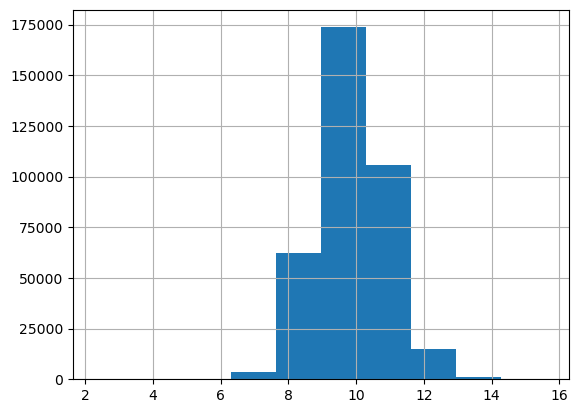

In [18]:
# 회귀 분석을 위해 target 데이터 log 씌위서 분포 변경

import numpy as np
np.log1p(num_h_df['Total Charges']).hist()

num_h_df['Total Charges'] = np.log1p(num_h_df['Total Charges'])

# Cycle01
- 차원 축소 없이 분석 진행

array([[<Axes: title={'center': 'Health Service Area'}>,
        <Axes: title={'center': 'Hospital County'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Race'}>],
       [<Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'Length of Stay'}>,
        <Axes: title={'center': 'Type of Admission'}>,
        <Axes: title={'center': 'Patient Disposition'}>,
        <Axes: title={'center': 'APR Risk of Mortality'}>],
       [<Axes: title={'center': 'APR Medical Surgical Description'}>,
        <Axes: title={'center': 'Emergency Department Indicator'}>,
        <Axes: title={'center': 'Operating Certificate Number'}>,
        <Axes: title={'center': 'Facility ID'}>,
        <Axes: title={'center': 'CCS Diagnosis Code'}>],
       [<Axes: title={'center': 'CCS Procedure Code'}>,
        <Axes: title={'center': 'APR DRG Code'}>,
        <Axes: title={'center': 'APR MDC Code'}>,
        <Axes: titl

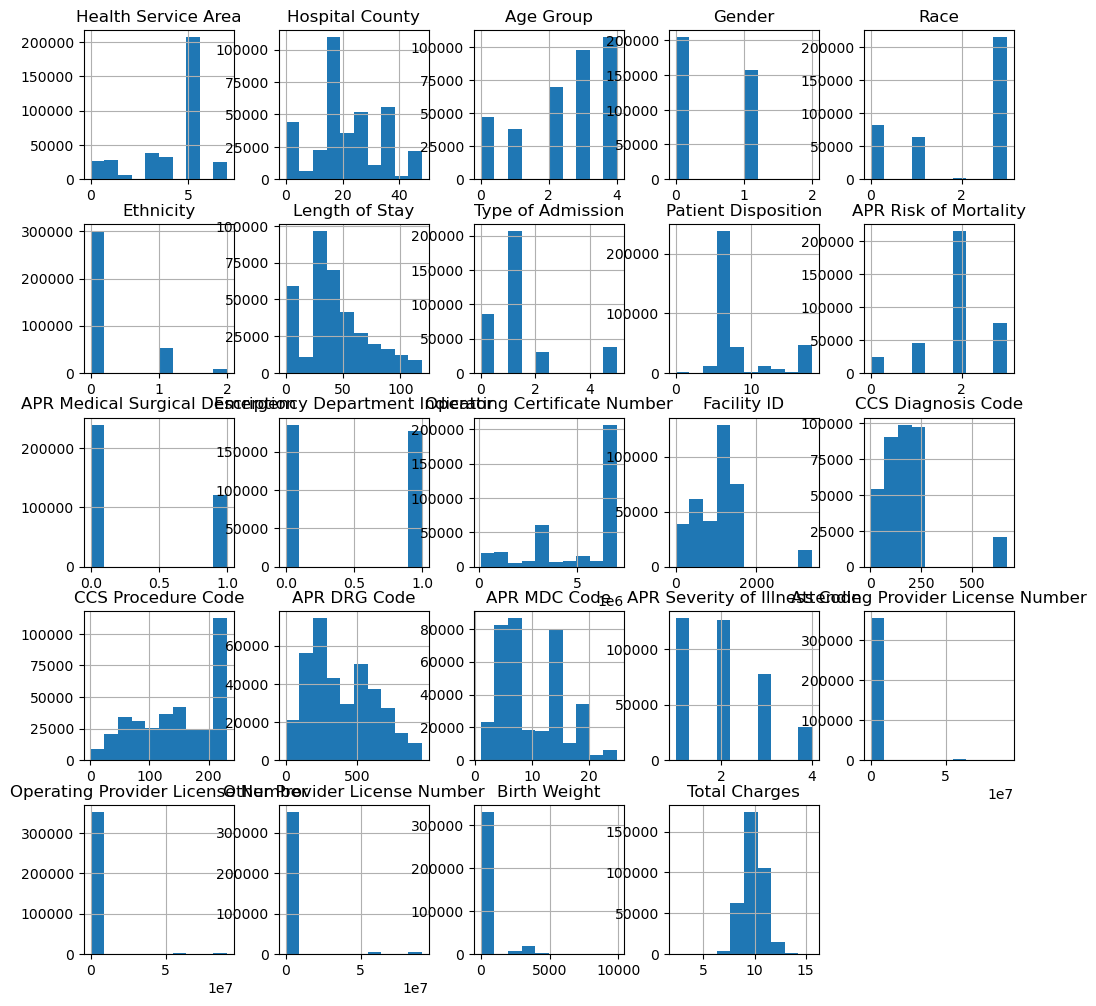

In [19]:
num_h_df.hist(figsize=(12,12))

In [20]:
# 회귀 분석 모델 사용
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = num_h_df.iloc[:, :-1], num_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_negative(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE,  R2))


In [23]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.4996, RMSE: 0.7068, MSLE: 0.0041, RMSLE: 0.0644, R2: 0.5210


In [24]:
# 비선형 모델 사용
# 회귀 분석 모델 사용
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [25]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 0.3935, RMSE: 0.6273, R2: 0.6228


In [26]:
# 상관관계 확인
num_h_df.corr()['Total Charges'].sort_values(ascending=False)[1:]

APR Severity of Illness Code         0.486630
Age Group                            0.422561
APR Medical Surgical Description     0.361859
Length of Stay                       0.298206
Patient Disposition                  0.240173
Race                                 0.076153
Health Service Area                  0.053485
Gender                               0.043458
Emergency Department Indicator      -0.003094
Operating Certificate Number        -0.029341
Attending Provider License Number   -0.043427
Facility ID                         -0.051807
Operating Provider License Number   -0.053363
Hospital County                     -0.073073
Other Provider License Number       -0.076901
Ethnicity                           -0.103746
Type of Admission                   -0.140865
CCS Diagnosis Code                  -0.156662
APR MDC Code                        -0.197764
APR DRG Code                        -0.228066
APR Risk of Mortality               -0.230462
CCS Procedure Code                

<Axes: xlabel='APR Severity of Illness Code', ylabel='Total Charges'>

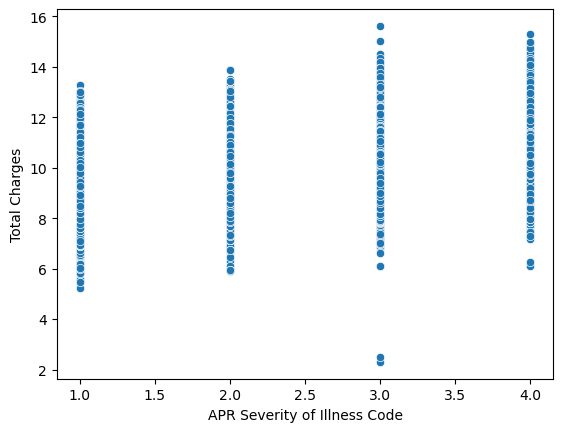

In [78]:
sns.scatterplot(x='APR Severity of Illness Code', y='Total Charges', data = num_h_df)

<Axes: >

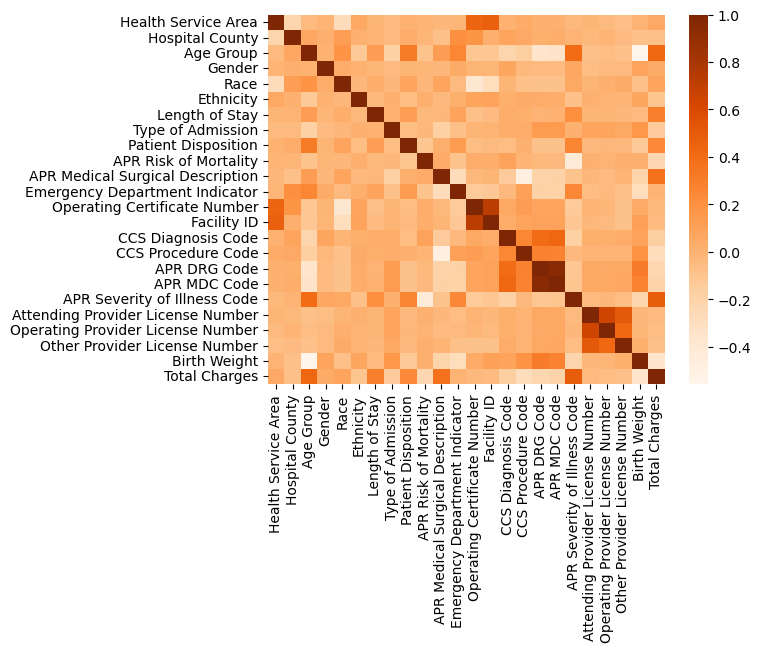

In [27]:
import seaborn as sns
corr = num_h_df.corr()
sns.heatmap(corr, cmap='Oranges')

In [28]:
from statsmodels.api import OLS

features, targets = num_h_df.iloc[:, :-1],  num_h_df.iloc[:, -1] 
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:          Total Charges   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          9.337e+05
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        14:59:16   Log-Likelihood:                     -6.0101e+05
No. Observations:              361441   AIC:                                  1.202e+06
Df Residuals:                  361418   BIC:                                  1.202e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = num_h_df.iloc[:, :-1],  num_h_df.iloc[:, -1] 

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.1748, RMSE: 0.4181, MSLE: 0.0015, RMSLE: 0.0383, R2: 0.8324
RandomForestRegressor
MSE: 0.0920, RMSE: 0.3033, MSLE: 0.0008, RMSLE: 0.0278, R2: 0.9118
GradientBoostingRegressor
MSE: 0.2004, RMSE: 0.4476, MSLE: 0.0016, RMSLE: 0.0406, R2: 0.8079
XGBRegressor
MSE: 0.0839, RMSE: 0.2896, MSLE: 0.0007, RMSLE: 0.0268, R2: 0.9196
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1909
[LightGBM] [Info] Number of data points in the train set: 289152, number of used features: 23
[LightGBM] [Info] Start training from score 9.866900
LGBMRegressor
MSE: 0.1040, RMSE: 0.3225, MSLE: 0.0009, RMSLE: 0.0296, R2: 0.9003


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [31]:
get_vif(features)

,vif_score,feature
0,8.740017,Health Service Area
1,5.760529,Hospital County
2,8.283720,Age Group
3,1.845001,Gender
4,3.904548,Race
5,1.214833,Ethnicity
6,3.548426,Length of Stay
7,1.930663,Type of Admission
8,7.004704,Patient Disposition
9,6.812613,APR Risk of Mortality


# Cycle02
- 모델의 공분산성을 지닌 수치 중 높은 수치에 대하여 삭제 후 확인
- 모델 훈련속도의 효율을 높이기 위해 차원축소를 진행.

In [32]:
c2_h_df = num_h_df.drop(labels = ['Operating Certificate Number', 'APR DRG Code', 'Health Service Area'], axis = 1)

In [33]:
features, targets = c2_h_df.iloc[:, :-1], c2_h_df.iloc[:, -1]
get_vif(features)

,vif_score,feature
0,4.711609,Hospital County
1,8.249438,Age Group
2,1.837959,Gender
3,3.674779,Race
4,1.210757,Ethnicity
5,3.544171,Length of Stay
6,1.927200,Type of Admission
7,6.952827,Patient Disposition
8,6.502704,APR Risk of Mortality
9,2.009720,APR Medical Surgical Description


In [34]:
c2_h_df.corr()['Total Charges'].sort_values(ascending=False)[1:]

APR Severity of Illness Code         0.486630
Age Group                            0.422561
APR Medical Surgical Description     0.361859
Length of Stay                       0.298206
Patient Disposition                  0.240173
Race                                 0.076153
Gender                               0.043458
Emergency Department Indicator      -0.003094
Attending Provider License Number   -0.043427
Facility ID                         -0.051807
Operating Provider License Number   -0.053363
Hospital County                     -0.073073
Other Provider License Number       -0.076901
Ethnicity                           -0.103746
Type of Admission                   -0.140865
CCS Diagnosis Code                  -0.156662
APR MDC Code                        -0.197764
APR Risk of Mortality               -0.230462
CCS Procedure Code                  -0.278166
Birth Weight                        -0.348888
Name: Total Charges, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

features, targets = c2_h_df.iloc[:, :-1], c2_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


In [37]:
from sklearn.decomposition import PCA

for i in range(4):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(X_train)

    # 손실율
    print(pca.explained_variance_ratio_.sum())

0.6792198233023751
0.9090310020482932
0.9999999961640793
0.9999999988122507


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = c2_h_df.iloc[:, :-1], c2_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

# pipe = Pipeline([('pca', PCA(n_components=2)), ('l_r', l_r)])
# 성능이 가장 좋았던 모델로 사용
pipe = Pipeline([('pca', PCA(n_components=10)), ('lgb_r', LGBMRegressor(random_state=321))])
pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 289152, number of used features: 10
[LightGBM] [Info] Start training from score 9.866142


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('lgb_r', LGBMRegressor(random_state=321))])

In [39]:
prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 0.2977, RMSE: 0.5456, R2: 0.7153


MSE: 0.2895, RMSE: 0.5380, R2: 0.7219


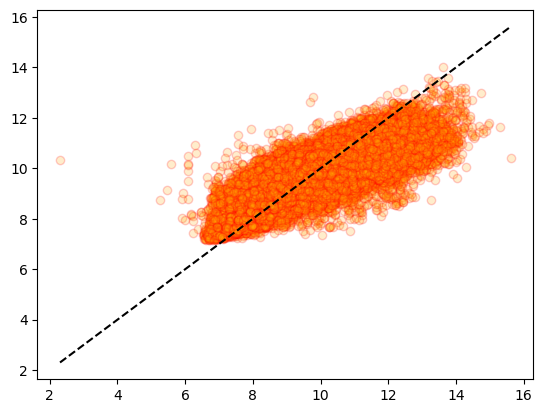

In [40]:
import matplotlib.pyplot as plt

# lgb_r.fit(X_train, y_train)
prediction = pipe.predict(X_train)
get_evaluation_negative(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.2977, RMSE: 0.5456, R2: 0.7153


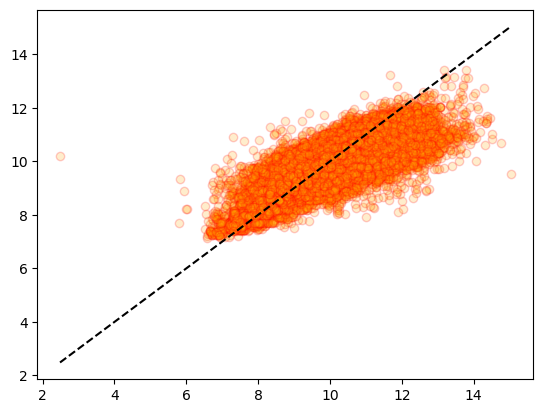

In [41]:
import matplotlib.pyplot as plt

prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# Cycle03 
- 검증데이터와 훈련데이터를 분류하여 교차검증 이후 과적합 유/무 판단

In [73]:
from sklearn.model_selection import cross_val_score, KFold

features, targets = c2_h_df.iloc[:,:-1], c2_h_df.iloc[:,-1]

kf = KFold(n_splits=10, random_state=321, shuffle=True)
scores = cross_val_score( lgb_r, features, targets , cv=kf)
scores

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 325296, number of used features: 20
[LightGBM] [Info] Start training from score 9.867059
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 325297, number of used features: 20
[LightGBM] [Info] Start training from score 9.867183
[LightGBM] [Warning] Found

array([0.89412771, 0.89391949, 0.89559464, 0.89305629, 0.89536895,
       0.89599536, 0.89029503, 0.89492653, 0.89381586, 0.89115958])

In [85]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler


features, targets = c2_h_df.iloc[:,:-1], c2_h_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=15, random_state=321, shuffle=True)

parameters = {
    'lgb_r__num_leaves': [10, 20, 30],
    'lgb_r__learning_rate': [0.05, 0.1, 0.15],
    'lgb_r__n_estimators': [50],
    'lgb_r__reg_lambda': [10000]  # L2 규제 추가
}

pipe = Pipeline(
    [
        ('lgb_r', LGBMRegressor(random_state=321))
    ]
)

grid_lgb = GridSearchCV(pipe, param_grid=parameters, cv=kfold, scoring='r2')
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_lgb.best_score_))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1599
[LightGBM] [Info] Number of data points in the train set: 269875, number of used features: 20
[LightGBM] [Info] Start training from score 9.866808
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 269875, number of used features: 20
[LightGBM] [Info] Start training from score 9.867172
[LightGBM] [Warning] Found

In [86]:
prediction = grid_lgb.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 0.2015, RMSE: 0.4489, R2: 0.8068


## 특정한 과적합 정도는 보이지 않으나 차원 축소 진행시에도 점수가 높기 때문에 하이퍼 파라미터 조정을 통한 규제 사용